# <span style="color:rgb(199,21,11)">Projet d'optimisation pour le machine learning</span>
### <span style="color:rgb(199,21,11)">Master 2 IASD Apprentissage, 2022/2023</span>

#### <span style="color:rgb(199,21,11)">Projet réalisé par NDIAYE Maïrame</span>

Vous retrouvez dans ce notebook l'ensemble des implémentations des algorithmes et des réponses aux questions posées. 

# <span style="color:rgb(199,21,11)">Regularized Newton methods for machine learning </span>

In [1]:
import math
from math import sqrt

# Display
%matplotlib inline
import matplotlib.pyplot as plt

# SciPy - Efficient mathematical calculation
from scipy.linalg.special_matrices import toeplitz # A special kind of matrices
from scipy.linalg import svdvals # Singular values
from scipy.linalg import norm # Euclidean norm
from scipy.optimize import check_grad # Check accuracy between objective and gradient values
from scipy.optimize import fmin_l_bfgs_b # Efficient optimizer

# NumPy - Matrix and vector structures
import numpy as np # NumPy library
from numpy.random import multivariate_normal, randn # Probability distributions on vectors


## <span style="color:rgb(139,0,0)">Part 1 - Newton's method</span>


### <span style="color:rgb(139,0,0)">Implementation 1.1</span>

Nous implémentons ici la méthode de Newton dans sa forme la plus basique dont l'itération k est donnée par l'expression : 

\begin{aligned}
\\
w_{k+1} &= w_k + d_k,
&d_k = -\left[\nabla^2f(w_k)\right]^{-1} \nabla f(w_k)
\end{aligned}
$
$

*Remarques sur l'implémentation* :
- Dans la boucle principale nous rajoutons dans la condition d'arrêt le fait que la norme de la différence entre $w$ et $w_{target}$ soit nulle, ce qui signifie que la méthode a convergé.


In [ ]:
def newtons_methods(f,first_order, second_order, w0, w_target, n_iter=1000, verbose=True): 
    """
        Inputs:
            f : the objective function
            first_order : the first order derivative of f. A vector
            second_order : the second order derivative of f. An hessian matrix
            w0: Initial vector
            w_target : Target vector
            n_iter: Number of iterations
            verbose: Boolean value indicating whether the outcome of every iteration should be displayed
        Outputs:
            w_output: Final iterate of the method
            objvals : History of f values
            normits : History of distances between iterates and target     
    """


    objvals = []
    normits = [] 
    w = w0.copy()

    # Iteration counter
    k=0   

    obj = f(w) 
    objvals.append(obj);

    nmin = norm(w-w_target)
    normits.append(nmin)

    if verbose:
        print("\nNewton's method :")
        print(' | '.join([name.center(8) for name in ["iter", "fval", "dist"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))

    while (k < n_iter and nmin!=0):
      current_first_order = first_order(w)
      current_second_order = second_order(w)
      inverse_current_second_order = np.linalg.inv(current_second_order)
      d = - np.dot(inverse_current_second_order,current_first_order)
      w[:] = w + d
      obj = f(w)
      objvals.append(obj)
      nmin = norm(w-w_target)
      normits.append(nmin)
      k = k + 1

      if verbose:
          print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))  

    # Output
    w_output = w.copy()
    return w_output, np.array(objvals), np.array(normits)


### <span style="color:rgb(139,0,0)"> Question 1.1</span>

#### <span style="color:rgb(139,0,0)">a)</span>

Nous cherchons à appliquer la méthode basique de Newton sur ce problème quadratique fortement convex :

$$
\mathrm{minimize}_{w \in \mathbb{R}^3} \, q(w) = \left(w_1 + w_2 + w_3 - 5\right)^2 + 3\left(w_1 - w_2\right)^2 + 2\left(w_2 - 2w_3\right)^2
$$

Le minimum de ce problème est donné par : $
w^* = \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix}$

Soit $ w_0 \in \mathbb{R}^3, \quad w_0 = \begin{pmatrix} w_{01} \\ w_{02} \\ w_{03} \end{pmatrix}$

La première itération de la méthode de Newton basique est donnée par :

$$
\begin{aligned}
w_{1} &= w_0 + d_0,
&d_0 = -\left[\nabla^2q(w_0)\right]^{-1} \nabla q(w_0) \\
\end{aligned}$$

Nous avons : 

$$\nabla q(w_0)= \begin{pmatrix} 2\left(w_{01} + w_{02} + w_{03} - 5\right) + 6\left(w_{01} - w_{02}\right) \\ 2\left(w_{01} + w_{02} + w_{03} - 5\right) - 6\left(w_{01} - w_{02}\right) + 4\left(w_{02} - 2w_{03}\right) \\ 2\left(w_{01} + w_{02} + w_{03} - 5\right) - 8\left(w_{02} - 2w_{03}\right) \end{pmatrix}$$
$    
$

$$\nabla^2q(w_0) = \begin{pmatrix} 
         8&-4&2 \\ 
        -4&12&-6 \\ 
         2&-6&18 
   \end{pmatrix}$$
$
$

$$\left[\nabla^2q(w_0)\right]^{-1} = \begin{pmatrix} 
          \frac{3}{20} & \frac{1}{20} & 0 \\ 
          \frac{1}{20} & \frac{7}{60} & \frac{1}{30} \\ 
          0 & \frac{1}{30} & \frac{1}{15} 
   \end{pmatrix}$$

En appliquant la formule de $d_0$, nous obtenons  :
$$d_0 = \begin{pmatrix} 2 - w_{01} \\ 2 - w_{02} \\ 1 - w_{03} \end{pmatrix}$$

Donc, finalement :
$$w_1 = \begin{pmatrix} w_{01} + 2 - w_{01} \\ w_{02} + 2 - w_{02} \\ w_{03} + 1 - w_{03} \end{pmatrix} = \begin{pmatrix} 2\\2\\1 \end{pmatrix} = w^*  $$
$
$

Ainsi, peu importe l'initialisation de départ, la méthode converge vers la solution en une itération. Il s'agit bien du comportement attendu pour un problème quadratique fortement convex. 

Maintenant, regardons si l'implémentation définie ci-dessus respecte bien ce comportement.  





#### <span style="color:rgb(139,0,0)">b)</span>

Dans cette partie, nous définissons les fonctions *q*, *grad_q* et *hessian_q* correspondants respectivement à la fonction objective, le gradient de la fonction objective et le gradient de second ordre de la fonction objective liée au problème définie ci-dessus. 

Nous initialisons *w_star* correspondant à la solution du problème. 
Nous définissons trois vecteurs initiaux :
- *w0* correspondant au vecteur origine
- *w1*
- *w2*

Nous appelons ensuite notre fonction *newtons_methods()* sur l'ensemble de ces points sur *5* itérations pour observer la convergence.



In [ ]:
q = lambda x: (x[0]+x[1]+x[2] - 5)**2 + 3*(x[0]-x[1])**2 + 2*(x[1] - 2*x[2])**2
grad_q = lambda x: np.array([2*(x[0]+x[1]+x[2] - 5)+6*(x[0]-x[1]),2*(x[0]+x[1]+x[2] - 5) - 6*(x[0]-x[1]) + 4*(x[1] - 2*x[2]),2*(x[0]+x[1]+x[2] - 5)- 8*(x[1] - 2*x[2])])
hessian_q = lambda x: np.array([[8,-4,2],[-4,12,-6],[2,-6,18]])

w_star = np.array([2,2,1])
w0 = np.array([0.,0.,0.])
w1 = np.array([4.,10.,20.])
w2 = np.array([-1.5,30,4])

In [ ]:
result0, objs0, nits_0 = newtons_methods(q,grad_q,hessian_q, w0, w_star, n_iter=5, verbose=True)
print("Résultat 1 : ", result0)

result1, objs1, nits_1 = newtons_methods(q,grad_q,hessian_q, w1,w_star, n_iter=5, verbose=True)
print("Résultat 2 : ", result1)

result2, objs2, nits_2 = newtons_methods(q,grad_q,hessian_q, w2,w_star, n_iter=5, verbose=True)
print("Résultat 3 : ", result2)


Newton's method :
  iter   |   fval   |   dist  
       0 | 2.50e+01 | 3.00e+00
       1 | 0.00e+00 | 0.00e+00
Résultat 1 :  [2. 2. 1.]

Newton's method :
  iter   |   fval   |   dist  
       0 | 2.75e+03 | 2.07e+01
       1 | 5.92e-31 | 4.44e-16
       2 | 0.00e+00 | 0.00e+00
Résultat 2 :  [2. 2. 1.]

Newton's method :
  iter   |   fval   |   dist  
       0 | 4.70e+03 | 2.84e+01
       1 | 3.03e-28 | 1.00e-14
       2 | 0.00e+00 | 0.00e+00
Résultat 3 :  [2. 2. 1.]


##### Observation

En observant les résultats, nous constatons bien une convergence à la première itération. En effet, dès la première itération, on a une distance entre $w$ et $w_{target}$ tellement petite (<= 1e-14) qu'elle peut être interprétée comme étant nulle. Ici, le teste a été réalisé seulement pour 3 points dans l'espace mais nous voyons bien que ce comportement ce répètera peu importe l'initialisation qui sera faite. 

Ainsi, la méthode de Newton basique est fortement adaptée pour les problèmes fortement convexes quadratiques car elle permet de trouver la solution du problème immédiatement. 

### <span style="color:rgb(139,0,0)"> Question 1.2</span>

#### <span style="color:rgb(139,0,0)">a)</span>

Nous cherchons désormais à appliquer la méthode basique de Newton sur la fonction de *Rosenbrock* qui n'est pas fortement convexe :

$$
\mathrm{minimize}_{w \in \mathbb{R}^2} \, q(w) = 100\left(w_2 - w_1^2\right)^2 + \left(1 - w_1\right)^2
$$

En analysant la définition de la fonction, nous voyons clairement que la solution au problème est donnée par  : $
w^* = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$

Soit $ w \in \mathbb{R}^2, \quad w = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix}$


Nous avons : 

$$\nabla q(w)= \begin{pmatrix} -400w_1(w_2 - w_1^2) -2(1-w_1) \\ 200(w_2 - w_1^2) \end{pmatrix}$$
$    
$

$$\nabla^2q(w) = \begin{pmatrix} 
         -400w_2 + 1200w_1^2+2&-400w_1 \\ 
        -400w_1&200 
   \end{pmatrix}$$
$
$

Alors que dans le premier problème, la hessienne était indépendante de $w$, dans ce nouveau problème ce n'est pas le cas. Ainsi, le problème n'est correctement défini que si le $w_0$ (initial) ne produit pas dans l'exécution de l'algorithme une hessienne qui soit non inversible. Donc, l'initialisation initiale compte.

Vient ainsi, une nouvelle question pour le problème : Quel $w_0$ choisir afin que les itérations soient correctement définies et que le méthode converge vers la solution ? 

Une autre question : Si la méthode est correctement définie, a-t-elle la même vitesse de convergence que dans le cas quadratique fortement convexe ? 

Pour avoir une idée des performances de la méthode sur ce nouveau problème, nous l'appliquons aux deux points:
- $w_{01} = \begin{pmatrix} -1.2 \\ 1 \end{pmatrix}$
- $w_{02} = \begin{pmatrix} 0 \\ \frac{1}{400} + 10^{-12} \end{pmatrix}$

Pour l'appliquer à ces points nous définissons *f*, *f_grad* et *f_hess* qui représentent respectivement la fonction objective, le gradient de la fonction objective et la hessienne de la fonction objective du problème *Rosenbrock*.

In [ ]:
f = lambda x: 100*((x[1]-(x[0])**2)**2) + (1-x[0])**2
f_grad = lambda x: np.array([-400*x[0]*(x[1]-(x[0])**2) - 2*(1-x[0]),200*(x[1]-(x[0])**2)])
f_hess = lambda x: np.array([[(1200*(x[0]**2) + 2 - 400*x[1]),(- 400*x[0])],[(- 400*x[0]),200]])

w01 =np.array([-1.2,1])
w02 = np.array([0,(1/400)+1e-12])
w_target = np.array([[1.],[1.]])

result1, objs1, nits_1 = newtons_methods(f,f_grad,f_hess, w01, w_target, n_iter=10, verbose=True)
print("Résultat 1 : ", result1)

result2, objs2, nits_2 = newtons_methods(f,f_grad,f_hess, w02,w_target, n_iter=10, verbose=True)
print("Résultat 2 : ", result2)


Newton's method :
  iter   |   fval   |   dist  
       0 | 2.42e+01 | 3.11e+00
       1 | 4.73e+00 | 3.12e+00
       2 | 1.41e+03 | 5.91e+00
       3 | 5.60e-02 | 6.78e-01
       4 | 3.13e-01 | 7.92e-02
       5 | 1.85e-11 | 1.36e-05
       6 | 3.43e-20 | 2.62e-11
       7 | 0.00e+00 | 0.00e+00
Résultat 1 :  [1. 1.]

Newton's method :
  iter   |   fval   |   dist  
       0 | 1.00e+00 | 2.00e+00
       1 | 1.60e+03 | 2.00e+00
       2 | 9.98e-01 | 4.46e+00
       3 | 9.94e+01 | 1.41e+00
       4 | 9.59e-08 | 9.79e-04
       5 | 9.20e-13 | 1.36e-07
       6 | 0.00e+00 | 0.00e+00
Résultat 2 :  [1. 1.]


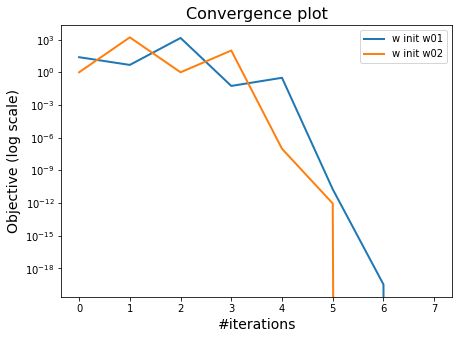

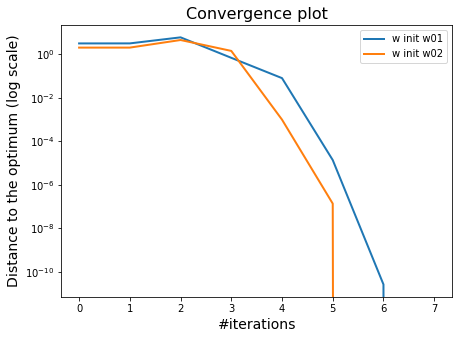

In [ ]:
# Comparison of the two results

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(objs1, label="w init w01", lw=2)
plt.semilogy(objs2, label="w init w02", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

# In terms of distance to the optimum (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(nits_1, label="w init w01", lw=2)
plt.semilogy(nits_2 , label="w init w02", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Distance to the optimum (log scale)", fontsize=14)
plt.legend()

##### Observation

La première remarque que nous pouvons faire est que $w_{01}$ et $w_{02}$ sont deux points qui permettent aux itérations d'être correctement définies. Toutes les hessiennes calculées en partant de ces points initiaux sont inversibles. 

En terme de convergence, nous voyons à travers les graphiques ci-dessus que la méthode converge pour les deux points. En effet, la méthode arrive à trouver la solution. Cependant, elle semble converger plus rapidement pour le point $w_{02}$. En effet, elle converge au bout de cinq itérations pour $w_{02}$ et au bout de six itérations pour $w_{01}$. 
Cette légère différence peut s'expliquer par le fait que $w_{02}$ est plus proche de la solution que $w_{01}$ comme le montre le plot sur les distances.

En matière de fonction objective, on voit que pour les deux points la méthode semble tatonner au cours des quatre premières itérations pour trouver la bonne fonction objective. Après cette itération la courbe a une décroissance brute. $w_{02}$ converge plus rapidement vers 0 que $w_{01}$.

Enfin, nous pouvons comparer la vitesse de convergence de la méthode pour ce problème à celle pour les problèmes quadratiques fortement convexes. Nous pouvons dire que pour ces deux problèmes la vitesse n'est pas la même. Alors que pour le premier problème la méthode convergeait en une itération, ici ce n'est pas le cas. La méthode est donc moins rapide pour ce type de problème mais la vitesse reste tout même très raisonnable en comparaison à d'autres méthodes comme la descente de gradient. 

In [ ]:
w03 = np.array([0,0.005])
#result3 = newtons_methods(f,f_grad,f_hess, w03,w_target, n_iter=10)
#print("Résultat 3 : ", result3)

En testant la méthode sur le point $w_{03} = \begin{pmatrix} 0 \\ 0.005 \end{pmatrix}$ nous avons l'erreur "Singular matrix". Effectivement, $w_{03}$ est un point produisant une hessienne non inversible, ce qui rends le calcul de l'itération impossible. 

Cela illustre la nature locale de la méthode de Newton. La méthode est capable de trouver la solution pour certains points très proches de la solution mais n'est pas garantie de fonctionner pour tous les points comme le montre cet exemple. 

Ainsi, pour conclure sur cette partie, nous pouvons dire que la méthode basique de Newton est parfaite pour des problèmes quadratiques fortement convexes. La méthode est également très efficace, en termes de vitesse de convergence, pour d'autres types de problèmes non fortement convexes comme le problème de Rosenbrock. Cependant, ces types de problèmes mettent en lumière la nature locale de la méthode de Newton. Pour qu'elle puisse être bien definie et converger, il est nécessaire de l'aider en choisissant une bonne initialisation.



## <span style="color:rgb(139,0,0)">Part 2 - A globally convergent version of Newton's method</span>

### <span style="color:rgb(139,0,0)">Implementation 2.1</span>

Pour pallier à la localité de la méthode de Newton, nous allons nous pencher sur les techniques de globalisation de la méthode. Ainsi, avec ces techniques la méthode de Newton convergera indépendamment de l'initialisation. 

Nous implémentons ici une technique de globalisation basée sur une régularisation quadratique dont l'itération k est donnée par l'expression : 


$$w_{k+1} = w_k + d_k, \quad d_k = - \left[ \nabla^2 f(w_k) + \gamma_k I \right]^{-1} \nabla f(w_k)$$

$
$

*Remarques sur l'implémentation* :
- Dans la boucle principale nous rajoutons dans la condition d'arrêt le fait que la norme de la différence entre $w$ et $w_{target}$ soit nulle, ce qui signifie que la méthode a convergé.


In [ ]:
def globalized_newtons_method(f,first_order, second_order, w0, w_target, c, mu, n_iter=1000, verbose=True): 
    """
        A code for globalized newton method.
        
        Inputs:
            f : the objective function
            first_order : the first order derivative of f. A vector
            second_order : the second order derivative of f. A hessian matrix
            w0: Initial vector
            w_target : Target vector
            n_iter: Number of iterations
            verbose: Boolean value indicating whether the outcome of every iteration should be displayed
            c : Real value between 0 and 1 used in the quadratic regularization
            mu : Real value > 1 used in the quadratic regularization
      
        Outputs:
            w_output: Final iterate of the method
            objvals : History of f values
            normits : History of distances between iterates and target       
    """

    # objective history
    objvals = []

    # iterates distance to the minimum history
    normits = []
    
    # Initial value of current iterate   
    w = w0.copy()

    # Initialize iteration counter
    k=0   

    # Current objective
    obj = f(w) 
    objvals.append(obj);

    # Current distance to the optimum
    nmin = norm(w-w_target)
    normits.append(nmin)

    if verbose:
      print("\nGlobalized Newton method :")
      print(' | '.join([name.center(8) for name in ["iter", "fval", "dist"]]))
      print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))

    ####################
    # Main loop

    while (k < n_iter and nmin!=0):
      current_first_order = first_order(w)
      current_second_order = second_order(w)

      eigen_values = np.linalg.eigvals(current_second_order)
      min_eigen_values = np.min(eigen_values)

      gamma_k = mu * max(-min_eigen_values,1e-10)

      d = -np.dot(np.linalg.inv(current_second_order + gamma_k  * np.identity(np.shape(w)[0])), current_first_order)

      term1 = f(w + d)
      term2 = f(w) + c*np.dot(d.T,current_first_order)

      while(term1 >= term2 ):
        gamma_k = mu * gamma_k
        d = -np.dot(np.linalg.inv(current_second_order + gamma_k  * np.identity(np.shape(w)[0])), current_first_order)
        term1 = f(w + d)
        term2 = f(w) + c*np.dot(d.T,current_first_order)

      w[:] = w + d

      obj = f(w)
      objvals.append(obj)
      nmin = norm(w-w_target)
      normits.append(nmin)
      k = k + 1
      if verbose:
          print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))  

      

    # Output
    w_output = w.copy()
    return w_output, np.array(objvals), np.array(normits)

### <span style="color:rgb(139,0,0)"> Question 2.1</span>

Nous cherchons à appliquer la technique de globalisation de Newton sur le problème de *Rosenbrock* :

$$
\mathrm{minimize}_{w \in \mathbb{R}^2} \, q(w) = 100\left(w_2 - w_1^2\right)^2 + \left(1 - w_1\right)^2
$$
$
$

Nous avons vu dans la partie précédente que la méthode basique de Newton ne fonctionne pas pour toutes les initialisations et que si elle est bien définit elle n'a pas les mêmes vitesses de convergence en fonction de l'initialisation. 

Vient alors deux questions concernant la technique de globalisation de Newton:
- Fonctionne-t-elle pour toutes les initialisations ?
- A-t-elle le même type de comportement que la méthode basique en terme de convergence ?

Regardons tout cela en appliquant la méthode sur les même points que dans la partie précédente.

Comme demandé dans la consigne de la question, nous appliquons la méthode avec $c = 0.0001$ et $\mu=2$.

In [ ]:
result1, objs1, nits_1 = globalized_newtons_method(f,f_grad, f_hess, w01, w_target, 0.0001, 2, n_iter=1000, verbose = True)
print("Résultat 1 : ", result1)

result2, objs2, nits_2 = globalized_newtons_method(f,f_grad, f_hess, w02, w_target, 0.0001, 2, n_iter=1000, verbose = True)
print("Résultat 2 : ", result2)

result3, objs3, nits_3 = globalized_newtons_method(f,f_grad, f_hess, w03, w_target, 0.0001, 2, n_iter=1000, verbose = True)
print("Résultat 3 : ", result3)


Globalized Newton method :
  iter   |   fval   |   dist  
       0 | 2.42e+01 | 3.11e+00
       1 | 4.73e+00 | 3.12e+00
       2 | 4.41e+00 | 2.67e+00
       3 | 3.11e+00 | 2.56e+00
       4 | 2.56e+00 | 2.42e+00
       5 | 1.98e+00 | 2.32e+00
       6 | 1.57e+00 | 2.19e+00
       7 | 1.12e+00 | 2.06e+00
       8 | 1.06e+00 | 1.83e+00
       9 | 5.45e-01 | 1.68e+00
      10 | 4.48e-01 | 1.41e+00
      11 | 2.34e-01 | 1.24e+00
      12 | 2.04e-01 | 8.82e-01
      13 | 6.91e-02 | 7.46e-01
      14 | 4.88e-02 | 4.14e-01
      15 | 1.05e-02 | 3.10e-01
      16 | 6.09e-03 | 5.50e-02
      17 | 7.53e-05 | 2.74e-02
      18 | 5.55e-07 | 2.72e-04
      19 | 6.51e-13 | 2.55e-06
      20 | 4.25e-23 | 2.36e-12
      21 | 0.00e+00 | 0.00e+00
Résultat 1 :  [1. 1.]

Globalized Newton method :
  iter   |   fval   |   dist  
       0 | 1.00e+00 | 2.00e+00
       1 | 9.72e-01 | 1.76e+00
       2 | 4.80e-01 | 1.61e+00
       3 | 3.73e-01 | 1.35e+00
       4 | 2.03e-01 | 1.18e+00
       5 | 1.88e-01 | 7

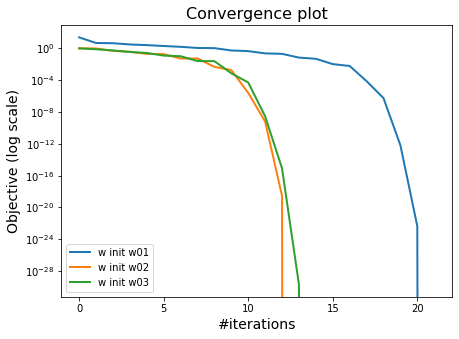

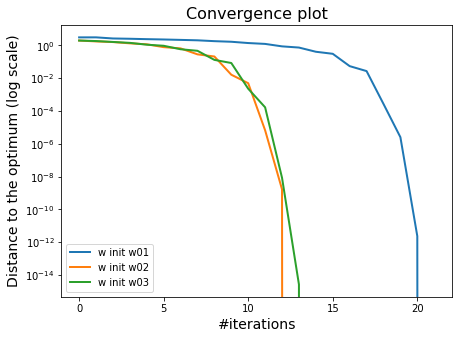

In [ ]:
# Comparison of the three results

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(objs1, label="w init w01", lw=2)
plt.semilogy(objs2, label="w init w02", lw=2)
plt.semilogy(objs3, label="w init w03", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

# In terms of distance to the optimum (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(nits_1, label="w init w01", lw=2)
plt.semilogy(nits_2 , label="w init w02", lw=2)
plt.semilogy(nits_3, label="w init w03", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Distance to the optimum (log scale)", fontsize=14)
plt.legend()

##### Observation

Le comportement n'est plus local mais global grâce à la régularisation quadratique. La méthode est bien définie pour n'importe quel point initiale. 

En terme de convergence, nous voyons à travers les logs de la fonction ainsi que les plots que la méthode converge pour tous les points. Cependant, la vitesse de convergence n'est pas la même. Elle trouve la solution au bout de douze itérations pour $w_{02}$, treize itérations pour $w_{03}$ et vingt itérations pour $w_{01}$. En regardant les plots, nous voyons que les courbes de $w_{02}$ et $w_{03}$ sont très proches. Cela s'explique par le fait que ces deux points ont des distances similaires au target et leurs fonctions objectives sont également quasi égales. La forme de la courbe pour $w_{01}$ est similaire aux autres mais elle met plus de temps à trouver la solution car le point est plus éloigné de la solution, il a une distance de *3.00* tandis que les deux autres ont une distance de *2.00*. 

Ainsi, nous pouvons dire que la bonne définition et la convergence de la méthode est indépendante de l'initialisation mais que la vitesse de convergence dépend de l'initialisation. Plus un point sera proche du target plus la méthode sera rapide pour trouver la solution. 

Si nous comparons cette méthode de globalisation à la méthode basique nous pouvons faire plusieurs remarques. 

Au niveau de la fonction objective, les méthodes se comportent de manière très différente. En effet, alors que la méthode basique de Newton semble osciller pendant plusieurs itérations avant de converger de façon brute vers la fonction objective minimale, la méthode de globalisation stagne plutôt durant les dix premières itérations avant de décroitre très rapidement vers la fonction objective minimale.

Au niveau de la vitesse de convergence, il y a également des différences. La méthode de globalisation est plus lente à converger que la méthode de Newton basique. Alors que la méthode basique de Newton a besoin de cinq itérations pour converger en partant de $w_{02}$ la globalisation utilise le double pour converger, on constate le même phénomène pour $w_{01}$. De plus, dans la méthode basique de Newton l'écart entre la vitesse de convergence de $w_{01}$ et $w_{02}$ n'est pas aussi grand que pour la globalisation.

Ainsi, la technique de globalisation est une alternative à la méthode basique de Newton permettant de se libérer de la limite d'initialisation mais au prix d'une convergence moins rapide.

### <span style="color:rgb(139,0,0)"> Question 2.2</span>

Dans la méthode de Newton globalisé, les paramètres $c$ et $\mu$ permettent de contrôler l'algorithme. 

Le paramètre $c$ est utilisé pour la satisfaction de la condition d'*Armijo* donnée dans l'algorithme par : $$f(w_k + d_k) \geq f(w_k) + c d_k^T \nabla f(w_k)$$
$
$

Cette condition permet de vérifier si le pas de recherche de la direction optimale est suffisamment petit pour éviter de sauter au dessus de la solution optimale. 

Le paramètre $\mu$ est un facteur multiplicatif pour la régularisation quadratique liée à la matrice hessienne. Ce paramètre est utilisé pour contrôler la dureté de la régularisation. 


Regardons désormais l'influence de ces paramètres sur les performances de la méthode par rapport à notre problème *Rosenbrock*. 

Nous allons tester les différentes valeurs en prennant comme initialisation le point $w_{02}$, en testant sur les autres points les résultats sont similaires. 

In [ ]:
c_values = [0.0000001,0.2,0.5,0.55,0.6]
objs_c = np.empty(len(c_values), dtype=object)
nits_c = np.empty(len(c_values), dtype=object)

for i in range(len(c_values)):
  _,obj,nit  = globalized_newtons_method(f,f_grad, f_hess, w02, w_target,c_values[i], 2, n_iter=1000, verbose = False)
  objs_c[i] = obj
  nits_c[i] = nit

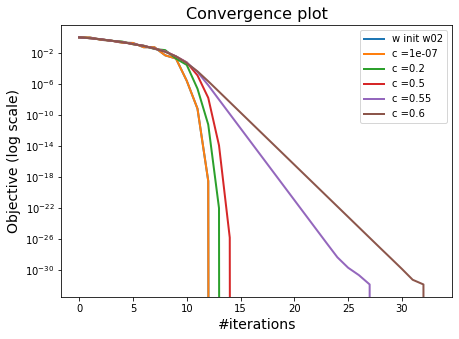

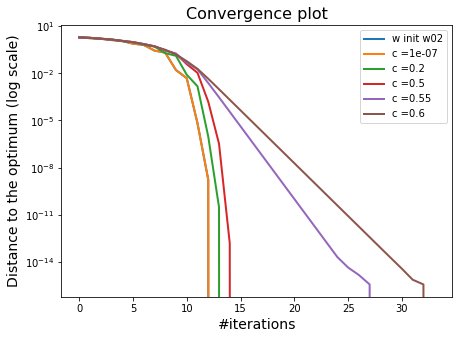

In [ ]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(objs2, label="w init w02", lw=2)
for i in range(len(c_values)):
  plt.semilogy(objs_c[i], label="c ="+str(c_values[i]), lw=2)


plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

# In terms of distance to the optimum (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(nits_2, label="w init w02", lw=2)
for i in range(len(c_values)):
  plt.semilogy(nits_c[i], label="c ="+str(c_values[i]), lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Distance to the optimum (log scale)", fontsize=14)
plt.legend()

Pour voir l'influence du paramètre $c$ sur la méthode, nous fixons tous les autres paramètres et faisons varier les valeurs de $c$. Nous avons choisi de tester l'algorithme pour $c \in \{0.0000001,0.2,0.5,0.55,0.6\}$. 

Ce que nous remarquons en terme de vitesse de convergence est que plus $c$ est petit moins l'algorithme fera d'itérations. Pour $c \in [0,0.5]$, le nombre d'itérations est inférieur à 15 et les courbes sont très proches. Cependant dès que $c$ dépasse 0.5, le nombre d'itérations dépasse 25 comme le montre les plots pour $c = 0.55$ et $c = 0.6$. De plus, lorsque $c \in ]0.5,1]$ on voit que la forme de la courbe change, en effet, elle stagne moins et a une décroissance plus lente. 

In [ ]:
mu_values = [4,8,12,16]
objs_mu = np.empty(len(mu_values), dtype=object)
nits_mu = np.empty(len(mu_values), dtype=object)

for i in range(len(mu_values)):
  _,obj,nit  = globalized_newtons_method(f,f_grad, f_hess, w02, w_target,0.0001, mu_values[i], n_iter=1000, verbose = False)
  objs_mu[i] = obj
  nits_mu[i] = nit

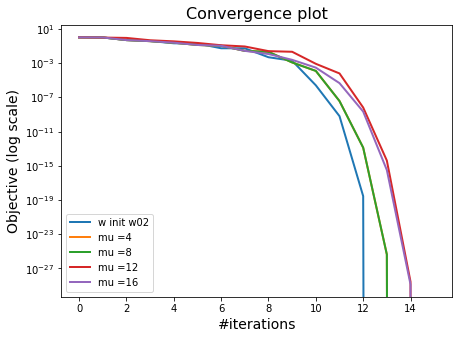

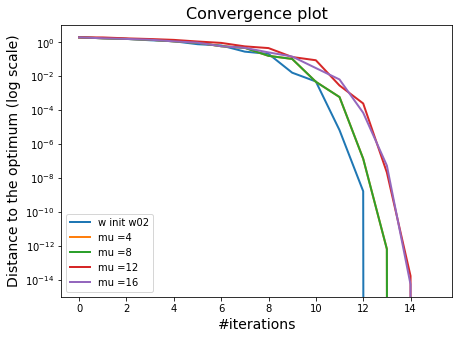

In [ ]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(objs2, label="w init w02", lw=2)
for i in range(len(mu_values)):
  plt.semilogy(objs_mu[i], label="mu ="+str(mu_values[i]), lw=2)


plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

# In terms of distance to the optimum (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(nits_2, label="w init w02", lw=2)
for i in range(len(mu_values)):
  plt.semilogy(nits_mu[i], label="mu ="+str(mu_values[i]), lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Distance to the optimum (log scale)", fontsize=14)
plt.legend()

Pour voir l'influence du paramètre $\mu$ sur la méthode, nous fixons tous les autres paramètres et faisons varier les valeurs de $\mu$. Nous avons choisi de tester l'algorithme pour $\mu \in \{4,8,12,16\}$. Nous n'avons pas testé pour $\mu = 1$ car cela conduirais à une boucle infinie dans la condition d'*Armijo*. 

Ce que nous remarquons en terme de vitesse de convergence est que plus $\mu$ est petit moins l'algorithme fera d'itérations. Cependant, nous voyons que contrairement au paramètre $c$, le paramètre $\mu$ n'entraîne pas une déformation de la courbe et il n'y a pas de saut en termes d'itérations en augmentant $\mu$. 

Ainsi, $\mu$ est nécessaire pour régulariser le problème et permettre à l'algorithme de vérifier certaines propriétés mais le choisir trop grand risque de rendre l'exécution plus lente. 

Évidemment, l'ensemble de ces conclusions sont liés à ce qu'on observe vis-à-vis de ce problème de *Rosenbrock*, sur un autre type de problème les conclusions peuvent être différentes.

## <span style="color:rgb(139,0,0)">Part 3 - Subsampling Newton-type methods</span>

### <span style="color:rgb(139,0,0)">Implementation 3.1</span>

Dans cette partie, nous nous intéressons aux méthodes de Newton à sous-échantillonnage. Il s'agit d'un type de méthode qui s'adapte aux formules de machine learning. 

De plus, ce type de méthode de Newton peut être très utile dans le cas où le jeu de donnée est très volumineux. En effet, dans ce cas de figure il devient très difficile voir impossible de stocker en mémoire tous les calculs pour tous les points du dataset. 

Nous nous focaliserons sur les problèmes sous forme de somme finie : 
$$
\mathrm{minimize}_{w \in \mathbb{R}^d} \, f(w) := \frac{1}{n}\sum_{i=1}^{n} f_i(w)
$$

L'itération $k$ de la méthode de Newton à sous-échantillonnage est donnée par :

$$w_{k+1} = w_k + d_k, \quad d_k = - \left[ \nabla^2 f_{S_k^H}(w_k) + \gamma_k I \right]^{-1} \nabla f_{S_k}(w_k)$$

avec :
- $S_k$ et $S_k^H$ des ensembles d'indices aléatoires tirés dans $\{1, . . . , n\}$

- $\nabla f_{S_k}(w_k) = \frac{1}{|S_k|}\sum_{i \in S_k} \nabla f_i(w_k)$

- $\nabla^2 f_{S_k^H}(w_k)= \frac{1}{|S_k^H|}\sum_{i \in S_k^H} \nabla^2f_i(w_k)$

$
$


*Remarques sur l'implémentation* :

Dans cette partie, nous n'analysons plus les algorithmes en termes d'itérations mais en terme d'epochs. En effet, cette notion a beaucoup plus de sens pour comparer les vitesses de convergence de la méthode. 

Une epoch correspond au fait d'accéder à tous les points du jeu de donnée. Autrement dit, il s'agit d'une passe complète dans le jeu de donnée. Ainsi, cette notion est différente de l'itération qui correspond à une passe complète dans les données du batch. 

Dans l'implémentation de l'algorithme, il était donc nécessaire de prendre en compte cette nouvelle notion. 

La condition d'arrêt n'est plus le nombre d'itérations mais le nombre d'epochs. 

Nous utilisons la variable $k$ pour parcourir les epochs et la variable $x$ pour parcourir les itérations. 

Avant de rentrer dans la boucle principale, nous stockons dans une variable nommé $n\_iter\_per\_epoch$ le nombre d'itérations nécessaires pour terminer une epoch, donnée par : $$n\_iter\_per\_epoch = \lceil \frac{n}{|S_k|+|S_k^H|} \rceil $$

Effectivement, lors de chaque itération, il y a $|S_k|+|S_k^H|$ points du datasets auxquels on accède, d'où la formule pour le nombre d'itérations. 

Ainsi, à chaque fois que $x$ est multiple de $n\_iter\_per\_epoch$ une epoch se termine. 

Une autre remarque sur la condition d'arrêt est l'ajout de la condition $nw < 10^{100}$. En effet, ne pas utiliser l'ensemble du dataset pour les calculs et choisir de façon aléatoire les points à utiliser fait que la convergence n'est pas totalement garantie et qu'il est possible de diverger. Dans cette situation, la condition $nw < 10^{100}$ permet de sortir de la boucle. 

In [41]:
def globalized_subsampling_newtons_method(w0, problem, w_target, c, mu, cardinal_s, cardinal_sh, n_epochs=100,with_replace=False,verbose=True): 
    """
        A code for globalized subsampling newton's method.
        
        Inputs:
            w0: Initial vector
            problem : Problem structure
            w_target : Target vector
            c : Real value between 0 and 1 used in the quadratic regularization
            mu : Real value > 1 used in the quadratic regularization
            cardinal_s : Size of Sk
            cardinal_sh : Size of Sk^H
            n_epochs: Number of epochs
            with_replace : Boolean indicating whether components are drawn with or without replacement
            verbose: Boolean value indicating whether the outcome of every iteration should be displayed
            
        Outputs:
            w_output: Final iterate of the method
            objvals : History of f values
            normits : History of distances between iterates and target       
    """

    # objective history
    objvals = []

    # iterates distance to the minimum history
    normits = []
    
    # Initial value of current iterate   
    w = w0.copy()
    nw = norm(w)

    # Initialize epoch counter
    k=1

    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);

    # Current distance to the optimum
    nmin = norm(w-w_target)
    normits.append(nmin)

    n = problem.n
    dimension = problem.d

    if verbose:
      print("Newton's method :")
      print(' | '.join([name.center(8) for name in ["iter", "fval", "dist"]]))
      print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))

    ####################
    # Main loop
    
    # Initialize iteration counter
    x = 0

    #Compute the number of iterations needed to achieve 1 epoch
    n_iter_per_epoch = int((n/(cardinal_sh+cardinal_s)))+1

    while (k <= n_epochs and nw < 10**100):

      ik = np.random.choice(n,cardinal_s,replace=with_replace)
      sg =  np.zeros(dimension)
      for j in range(cardinal_s):
        g_j = problem.grad_i(ik[j],w)
        sg = sg + g_j
      
      first_order_subsampling = (1/cardinal_s)*sg

      ikh = np.random.choice(n,cardinal_sh,replace=with_replace)
      sgh =  np.zeros((dimension,dimension))
    
      for j in range(cardinal_sh):
        g_2_j = problem.grad_2_i(ikh[j],w)
        sgh = sgh + g_2_j
      
      second_order_subsampling = (1/cardinal_sh)*sgh

      eigen_values = np.linalg.eigvals(second_order_subsampling)
      min_eigen_values = np.min(eigen_values)

      gamma_k = mu * max(-min_eigen_values,1e-10)
      d1 = -np.linalg.inv(second_order_subsampling + gamma_k  * np.identity(np.shape(w)[0])) 
      d = np.dot(d1,first_order_subsampling)

      f_w_d = 0
      w_d = w+d
      for j in range(cardinal_s):
        f_j = problem.f_i(ik[j],w_d)
        f_w_d = f_w_d + f_j
      f_w_d = (1/cardinal_s)*f_w_d


      f_w = 0
      for j in range(cardinal_s):
        f_j = problem.f_i(ik[j],w)
        f_w = f_w + f_j
      f_w = (1/cardinal_s)*f_w

      term2 = f_w + c*np.dot((d.T),first_order_subsampling)

      while(f_w_d >= term2):
        gamma_k = mu * gamma_k
        d1 = -np.linalg.inv(second_order_subsampling + gamma_k  * np.identity(np.shape(w)[0])) 
        d = np.dot(d1,first_order_subsampling) 
        f_w_d = 0
        w_d = w+d
        for j in range(cardinal_s):
          f_j = problem.f_i(ik[j],w+d)
          f_w_d = f_w_d + f_j
        f_w_d = (1/cardinal_s)*f_w_d

        term2 = f_w + c*np.dot((d.T),first_order_subsampling)

      w[:] = w + d
      nw = norm(w)
      obj = problem.fun(w)
      nmin = norm(w-w_target)
      
      x+=1

      # Plot quantities of interest at the end of every epoch only
      if (x%(k*n_iter_per_epoch)==0):
          objvals.append(obj)
          normits.append(nmin)
          if verbose:
              print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)])) 
          k+=1   

    # Output
    w_output = w.copy()
    return w_output, np.array(objvals), np.array(normits)

### <span style="color:rgb(139,0,0)"> Question 3.1</span>

Nous cherchons dans cette partie à appliquer notre méthode de Newton à sous échantillonnage sur le problème de régression logistique définit par :
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(w) 
    := \frac{1}{n} \sum_{i=1}^n f_i(\mathbf{w}), \qquad 
    f_i(\mathbf{w})=\log(1+\exp(-y_i \mathbf{x}_i^T \mathbf{w}))
$$
$
$

Nous avons:
$$
    \nabla f_i(\mathbf{w}) = - \frac{y_i}{1 + \exp(y_i \mathbf{x}_i^T \mathbf{w})} \mathbf{x}_i
$$
$
$

$$
    \nabla^2 f_i(\mathbf{w}) = \frac{\exp(y_i \mathbf{w}^T \mathbf{x}_i)}{1 + \exp(y_i \mathbf{w}^T \mathbf{x}_i)} \mathbf{x}_i \mathbf{x}_i^T
$$







La fonction *simu_linmodel()* ci-dessous a été reprise du Notebook 4 du cours et permet de générer les données. 

In [3]:
# Data generation.
# This code is inspired by a generator proposed by A. Gramfort.

def simu_linmodel(w, n, std=1., corr=0.5): 
    d = w.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    y = X.dot(w) + noise
    return X, y

La classe *RegPb()* permet d'instancier le problème de regression que nous avons présenté plus haut. Elle prends en paramètre une matrice $X$ de données, un vecteur $y$ et un scalaire $lbda$ qui est optionnel et qui permet de régulariser le problème. 

Au sein de cette classe, nous définissons les différentes fonctions dont nous avons besoin pour appliquer notre méthode de Newton sous échantillonné. 

Nous y retrouvons les méthodes suivantes :
- $fun()$ qui calcule la valeur de la fonction objective.
- $f\_i()$ qui calcule la valeur partielle de la fonction objective pour un point donné.
- $grad()$ qui calcule le gradient complet de la fonction objective.
- $grad\_i()$ qui calcule le gradient partiel pour un point donné.
- $grad\_2()$ qui calcule la Hessienne complète de la fonction objective.
- $grad\_2\_i$ qui calcule la Hessienne partielle pour un point donné.
- $lipgrad()$ qui calcule la constante de Lipschitz pour le gradient de la fonction objective.

In [4]:
# Python class for log regression problem
class RegPb(object):
 
    # Instantiate the class
    def __init__(self, X, y,lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda
        
    # Objective value
    def fun(self, w):
          yXw = self.y * self.X.dot(w)
          return np.mean(np.log(1. + np.exp(-yXw))) + self.lbda * norm(w) ** 2 / 2.
    
    # Partial objective value
    def f_i(self, i, w):
          y_i = self.y[i]
          x_i = self.X[i]
          yXwi = y_i * np.dot(x_i, w)
          return np.log(1. + np.exp(- yXwi)) + self.lbda * norm(w) ** 2 / 2.
    
    # Full gradient computation
    def grad(self, w):
          yXw = self.y * self.X.dot(w)
          aux = 1. / (1. + np.exp(yXw))
          return - (self.X.T).dot(self.y * aux) / self.n + self.lbda * w
    
    # Partial gradient
    def grad_i(self,i,w):
        y_i = self.y[i]
        x_i = self.X[i]
        grad = - x_i * (y_i / (1. + np.exp(y_i* x_i.dot(w))))
        grad += self.lbda * w
        return grad

    # Full second order gradient computation
    def grad_2(self, w):
        yXw = self.y * self.X.dot(w)
        num = np.exp(yXw)
        aux = (1. + num)**2
        return ((self.X.T*(num/aux)).dot(self.X)) / self.n + self.lbda * np.eye(self.d)

    # Partial second order gradient
    def grad_2_i(self,i,w):
        x_i = self.X[i]
        y_i = self.y[i]
        dot_product = x_i.dot(w)
        exponent = np.exp(y_i * dot_product)
        gradient = (exponent / ((1 + exponent) ** 2)) * np.outer(x_i,x_i.T)
        gradient += self.lbda * np.eye(self.d)
        return gradient

    # Lipschitz constant for the gradient
    def lipgrad(self):
        L = 4*norm(self.X, ord=2) ** 2 / self.n + self.lbda
        return L

Nous générons ensuite les données. Nous utilisons le même jeu de données synthétique que celui dans le Lab4 du cours. 

Nous instancions ensuite le problème avec le jeu de données généré. 

In [42]:
d = 50
n = 1000
idx = np.arange(d)
lbda = 1. / n ** (0.5)

# Fix random seed for reproducibility
np.random.seed(0)

# Ground truth coefficients of the model
w_model_truth = (-1)**idx * np.exp(-idx / 10.)

Xlog, ylog = simu_linmodel(w_model_truth, n, std=1., corr=0.7)
ylog = np.sign(ylog) # Taking the logarithm for binary classification

pblogreg = RegPb(Xlog, ylog,lbda)

In [43]:
# Use L-BFGS-B to determine a solution for both problems
w_init = np.zeros(d)
# Compute the optimal solution for logistic regression
w_min_log, f_min_log, _ = fmin_l_bfgs_b(pblogreg.fun, w_init, pblogreg.grad, args=(), pgtol=1e-30, factr =1e-30)

print(f_min_log)
print(norm(pblogreg.grad(w_min_log)))

0.5571363594573261
3.4874231660361966e-09


Pour comparer la méthode échantillonnée à la méthode régularisée de Newton nous avons procédés de la manière suivante:
- Nous avons choisit un nombre d'epochs de *100* pour effectuer la comparaison. 

- Nous initialisons notre $w_0$ au vecteur nul de dimension d. 
- Pour appliquer la méthode régularisée de Newton à ce problème nous n'avons pas construit de nouvelle fonction. Effectivement, lorsque $|S_k|=|S_k^H|=n$ la méthode échantillonnée est équivalente à la méthode régularisée. Donc pour appliquer la méthode régularisée nous appelons la fonction $globalized\_subsampling\_newtons\_method()$ avec $cardinal\_s=cardinal\_sh=1000$. 
- Nous avons choisit de tester la méthode échantillonnée avec les combinaisons de batchs suivantes $\{(1,1),(20,50),(50,20),(500,200),(700,500),(700,100),(900,100)\}$ où le premier élément de chaque couple correspond au $cardinal\_s$ et le deuxième élément au $cardinal\_sh$. L'idée derrière ces choix de batchs est de voir comment ces paramètres peuvent influencer la convergence, la précision, la variance ainsi que la complexité temporelle du modèle. 
- Nous appliquons les différentes méthodes avec comme paramètre $c=0.9$ et $\mu=2$. Après plusieurs tests, nous avons opté pour cette combinaison de paramètres qui semble être la meilleure pour ce problème et ce jeu de données synthétiques. Nos tests ont révélé que lorsque $c$ est très petit (par exemple $c=0.0001$), l'algorithme reste longtemps dans la boucle de la condition d'Armijo, ce qui produit des valeurs exponentielles extrêmement grandes qui dépassent la plage de valeurs acceptables et provoquent l'erreur "array must not contain infs or NaNs". Grâce à notre choix de paramètres, nous n'avons plus rencontré ce genre de problème.

In [44]:
nb_epochs = 100
n = pblogreg.n
w0 = np.zeros(d)

In [47]:
#Affichage de la solution du problème 
w_min_log

array([ 0.90909888, -0.60632091,  0.64068899, -0.47924515,  0.31137472,
       -0.20178056,  0.35911024, -0.33620308,  0.32800794, -0.30998931,
        0.24112689, -0.17824247,  0.21754931, -0.13830616, -0.0097551 ,
       -0.10693499,  0.03746829, -0.14357745,  0.22521611, -0.0813517 ,
        0.16960446, -0.06278201,  0.01599086, -0.04415703,  0.065342  ,
       -0.05814127,  0.05525224,  0.04185448,  0.05087131, -0.08394217,
        0.06768791,  0.04045037,  0.04285379, -0.11972176,  0.04834777,
        0.05040729, -0.13670345,  0.03753964,  0.03530385,  0.00851951,
       -0.04785407, -0.078258  , -0.0842221 ,  0.00301204,  0.02883071,
        0.09147033,  0.05415261, -0.04852474, -0.01425393, -0.07032371])

In [9]:
w_a, obj_a, nits_a = globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 1000, 1000, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("Résultat : ",w_a)

Résultat :  [ 0.90909712 -0.60631808  0.64068613 -0.47924242  0.31137202 -0.20177832
  0.35910857 -0.33620191  0.32800685 -0.30998796  0.24112551 -0.17824142
  0.21754861 -0.13830544 -0.00975582 -0.10693494  0.03746845 -0.14357738
  0.22521543 -0.08135091  0.16960419 -0.06278196  0.01599133 -0.04415719
  0.06534146 -0.05814029  0.05525101  0.04185576  0.05087033 -0.08394131
  0.06768706  0.04045064  0.04285386 -0.11972167  0.04834787  0.05040704
 -0.13670331  0.03753964  0.03530399  0.0085193  -0.04785348 -0.07825861
 -0.08422192  0.00301228  0.02883027  0.09147047  0.05415269 -0.04852531
 -0.01425303 -0.0703242 ]


In [10]:
w_b, obj_b, nits_b=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 1, 1, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_b)

resultat :  [ 1.03747061e+00 -3.17083511e-01  6.45695442e-01 -3.00486288e-01
  3.31367746e-01 -7.81590301e-02  2.75828703e-01 -2.52004544e-01
  2.63581304e-01 -2.43491616e-01  2.42410005e-01 -3.34471286e-01
  3.08954577e-01 -5.69694875e-02 -5.59653832e-02 -9.62071087e-02
  3.05400252e-02 -8.40026041e-02  3.55276394e-01  1.57189288e-02
  3.99347649e-01  7.89131014e-02  1.60730055e-01  8.92332735e-02
  2.19769996e-02 -1.11811357e-01 -7.30033234e-02  1.43696904e-01
 -1.87225022e-02 -2.25622747e-02  4.37452732e-02  1.96483625e-01
  1.18859962e-02 -1.45491001e-01 -7.68960735e-02  6.95143000e-02
 -1.91093684e-01  7.78498559e-02  9.93364239e-02  1.02797193e-01
 -1.88406748e-01 -2.05388408e-01 -1.03896325e-01  1.78934245e-01
  4.18263582e-02  2.10570902e-01  1.30419419e-01  7.96194611e-02
  8.60169576e-04 -1.95739273e-01]


In [11]:
w_c, obj_c, nits_c=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 20, 50, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_c)

resultat :  [ 0.92023644 -0.64015344  0.6186072  -0.46816031  0.40154121 -0.22007265
  0.42342184 -0.33632733  0.3402753  -0.3314382   0.31069632 -0.24368484
  0.20568715 -0.12013663 -0.0100571  -0.0754678  -0.03395433 -0.16996295
  0.30756535 -0.03841297  0.114116   -0.05692046  0.07772197 -0.03966207
  0.12255784 -0.07047379  0.01012866  0.04553739 -0.02229904 -0.21300003
  0.08709428  0.12274091  0.18376955 -0.08775452  0.14689762  0.01566347
 -0.10995865  0.05523364  0.04196988  0.0383179  -0.14552218 -0.20196519
 -0.08654331 -0.01282328  0.13614653  0.1511059   0.02733952 -0.09764041
  0.00715739 -0.05857652]


In [12]:
w_d, obj_d, nits_d=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 50, 20, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_d)

resultat :  [ 9.15660715e-01 -6.94320730e-01  6.03501472e-01 -4.61172393e-01
  2.53478157e-01 -1.91075546e-01  3.47492237e-01 -3.97283568e-01
  3.54675960e-01 -3.45060828e-01  2.56247276e-01 -1.29407212e-01
  2.48785573e-01 -2.05006064e-01 -2.20958521e-04 -1.50517056e-01
 -6.53862661e-03 -1.31742995e-01  2.73747404e-01 -9.29035057e-02
  1.68820619e-01 -1.21078769e-01  7.00887993e-02 -2.86663597e-02
  4.65960149e-02 -3.38380705e-02  1.14380288e-01  8.84861236e-02
  3.83086158e-02 -8.30720227e-02  5.91832265e-02 -5.95366179e-02
 -9.28881239e-05 -1.27426259e-01  5.70290125e-02 -1.07184301e-02
 -2.11599515e-01  8.64342346e-02  4.96207442e-02 -6.36656728e-02
 -7.73619719e-02 -4.27534738e-02 -1.37692964e-02 -7.14570425e-02
  3.04092966e-02  9.61785058e-02  7.56199353e-02 -5.07306302e-02
 -7.11885996e-02 -1.55340654e-01]


In [13]:
w_e, obj_e, nits_e=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 500, 200, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_e)

resultat :  [ 0.89971292 -0.60617265  0.62468351 -0.47938414  0.32046116 -0.19361006
  0.34616264 -0.34600199  0.33301049 -0.31783174  0.24379458 -0.17046833
  0.19881517 -0.13684444 -0.01838273 -0.10546787  0.03133456 -0.14907323
  0.24563415 -0.07648427  0.15920571 -0.06912864  0.01671915 -0.03660486
  0.07414446 -0.06945352  0.04063692  0.02504054  0.04624499 -0.08391664
  0.05549275  0.02680532  0.03535759 -0.1292781   0.03229556  0.04843121
 -0.12365464  0.03868912  0.0308089   0.00566254 -0.05953777 -0.0806811
 -0.10174259  0.00133806  0.0183745   0.08857721  0.03578499 -0.06044415
 -0.02472442 -0.06043196]


In [14]:
w_f, obj_f, nits_f=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 700, 500, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_f)

resultat :  [ 0.89629979 -0.55845023  0.60073217 -0.4439313   0.29271321 -0.19065752
  0.3443534  -0.32072584  0.29813579 -0.29965816  0.22057193 -0.17483365
  0.22093006 -0.13168772 -0.00690696 -0.10236145  0.03592192 -0.13906665
  0.21433279 -0.06797923  0.17359433 -0.05677993  0.02102275 -0.04665953
  0.06758165 -0.05771943  0.0422961   0.04451971  0.04425723 -0.0777249
  0.07025117  0.04779571  0.04579129 -0.12569813  0.04517642  0.04097652
 -0.13747348  0.0462552   0.03827438  0.01558034 -0.05104854 -0.07738977
 -0.0802945   0.00810618  0.02512479  0.08363886  0.06347816 -0.05882628
 -0.02498644 -0.08528007]


In [15]:
w_g, obj_g, nits_g=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 700, 100, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_g)

resultat :  [ 0.91406841 -0.60697342  0.6243563  -0.47986815  0.31819463 -0.20565997
  0.36716531 -0.33273878  0.32261377 -0.31120434  0.2379697  -0.18618007
  0.20635934 -0.13072518 -0.00639813 -0.11275508  0.0351187  -0.13914479
  0.23667636 -0.07330464  0.17198807 -0.07032672  0.00549662 -0.05119412
  0.06140797 -0.06459487  0.05058074  0.04077849  0.05134166 -0.07774322
  0.07364961  0.05268507  0.03593456 -0.12269601  0.02995913  0.04184433
 -0.13531172  0.04593765  0.0404875   0.01378751 -0.04156611 -0.08852251
 -0.0868427  -0.00488577  0.03415842  0.10186439  0.04304165 -0.05437705
 -0.01005945 -0.05805574]


In [16]:
w_h, obj_h, nits_h=globalized_subsampling_newtons_method(w0, pblogreg,w_min_log, 0.9, 2, 900, 100, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_h)

resultat :  [ 0.91039399 -0.59881451  0.63655049 -0.47903716  0.31316915 -0.19844538
  0.35470083 -0.33658329  0.32040102 -0.31518235  0.23558333 -0.18152063
  0.21887989 -0.14143011 -0.01692233 -0.10892451  0.04459229 -0.14149906
  0.22563546 -0.08376677  0.17229898 -0.05749225  0.0150475  -0.0459218
  0.06690091 -0.05711654  0.05517068  0.04174427  0.05944858 -0.08469373
  0.06642901  0.03637874  0.04117757 -0.12201527  0.04593848  0.04935442
 -0.13665403  0.03588526  0.03798366  0.01330191 -0.0461544  -0.07907687
 -0.0817162   0.0032501   0.02734734  0.08633262  0.05063357 -0.04905156
 -0.01029011 -0.0819583 ]


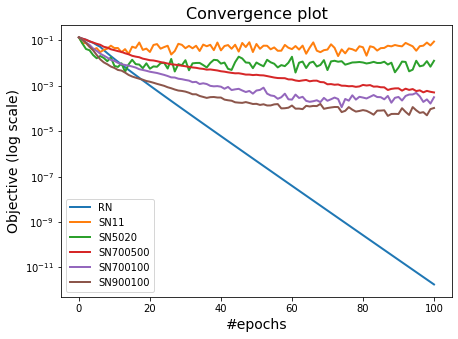

In [46]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a-f_min_log, label="RN", lw=2)
plt.semilogy(obj_b-f_min_log, label="SN11", lw=2)
plt.semilogy(obj_d-f_min_log, label="SN5020", lw=2)
plt.semilogy(obj_f-f_min_log, label="SN700500", lw=2)
plt.semilogy(obj_g-f_min_log, label="SN700100", lw=2)
plt.semilogy(obj_h-f_min_log, label="SN900100", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

#### Observation 

Nous pouvons analyser les résultats sur différents plans:

- Sur le plan de la précision:

Nous pouvons voir à travers les résultats ainsi que le plot que certaines méthodes sont beaucoup plus proches de la solution que d'autres. On voit que la méthode de Newton régularisé est la plus proche de la solution et qu'elle a un grand écart avec les méthodes sous échantillonnées. 

Sa courbe est également différente des autres, elle est linéaire tandis que celles des autres sont plus bruitées. La variance des méthodes sous-échantillonnés s'explique par le fait qu'à chaque itération de nouveaux points sont choisis pour réaliser les calculs. Les tailles des batchs ont également une influence sur la variance. Effectivement, nous constatons que plus $cardinal\_sh$ est grand plus la courbe est lisse. En regardant le plot, nous voyons par exemple que la courbe *SN700500* est beaucoup plus lisse que les autres.

Un autre point que nous remarquons sur l'influence de la taille des batchs  est que la méthode est plus performante lorsqu'elle $cardinal\_s >> cardinal\_sh$. Par exemple, la modèle lié à la courbe *SN900100* est meilleur que celui avec *SN700500* qui est lui même meilleur que *SN700100*.

Ainsi, si nous comparons les modèles en terme de précision nous dirons que la méthode régularisée est meilleure que la méthode sous-échantillonnée à partir de la 20ème epoch. Parmi les méthodes sous-échantillonnées celle avec $cardinal\_s = 900$ et $cardinal\_sh = 100$ est la meilleure et celle avec $cardinal\_s = 1$ et $cardinal\_sh = 1$ est la moins bonne. 

- Sur le plan de la convergence:

En regardant le plot, nous voyons que la méthode régularisée converge vers la fonction de valeur optimale mais que les méthodes sous échantillonnées semblent stagner après un certain nombre d'epochs sur une valeur maximale qu'ils peuvent atteindre. 

- Sur le plan de la complexité temporelle:

Étant donné que dans cette partie nous traitons avec un ensemble de données plus grand, nous avons décidé de comparer les performances en terme de complexité temporelle, qui est également un paramètre important dans le choix d'un algorithme. Nous avons relevé le temps d'éxécution de chaque modèle et obtenons: 

  *RN* : 1min12s

  *SN11* : 5min17s

  *SN2050* : 36s

  *SN5020* : 1min6s

  *SN500200* : 1min15s

  *SN700500* : 53s

  *SN700100* : 1min42s

  *SN900100* : 2min11s

On a essentiellement des résultats attendus comme le fait que *SN11* soit le plus lent étant donné le nombre d'itérations nécessaires pour terminer une epoch. De même, pour *SN2050* et *SN5020*, on s'attend à un tel résultat car pour ces deux élements on a besoin du même nombre d'itérations pour finir une epoch mais une itération de *SN5020* sera plus longue. Effectivement, à chaque itération, l'ensemble $S_k$ est utilisé à trois reprises pour faire des calculs tandis que l'ensemble $S_k^H$ est utilisé uniquement pour calculer la hessienne. Donc logiquement plus $|S_k|$ est grand plus le temps s'alonge. Ainsi, le temps d'exécution est fortement dépendant de la taille des batchs. 

### <span style="color:rgb(139,0,0)"> Question 3.2</span>

Comparons désormais notre meilleure méthode sous-échantillonnée à la méthode de gradient stochastique par lots dont l'itération $k$ est donnée par:

$$w_{k+1}= w_k - \frac{\alpha_k}{|S_k|}\sum_{i \in S_k} \nabla f_i(w_k)$$

avec:
- $S_k$ un ensemble d'indices aléatoires tirés dans $\{1, . . . , n\}$
- $\alpha_k$ le paramètre d'apprentissage. Dans notre problème nous le choisirons constant et proportionnel à $\frac{1}{L}$ où $L=4\frac{\|\mathbf{X} \mathbf{X}^T\|}{n}+\lambda$.

In [48]:
#Batch stochastic gradient 

def batch_stochastique_grad(w0,problem,wtarget,n_epochs=100,cardinal_s=1,coef_mult=1,with_replace=False,verbose=False): 
    """
        A code for batch stochastique gradient.
        
        Inputs:
            w0: Initial vector
            problem: Problem structure
            wtarget: Solution vector
            coef_mult : Multiplier of 1/L to determine the learning rate
            n_epochs: Number of epochs, used as stopping criterion
            cardinal_s: Size of Sk
            with_replace: Boolean indicating whether components are drawn with or without replacement
            verbose: Boolean indicating whether information should be plot at every iteration
            
        Outputs:
            w_output: Final iterate of the method
            objvals : History of f values
            normits : History of distances between iterates and target      
    """

    # objective history
    objvals = []
    
    # iterates distance to the minimum history
    normits = []
    
    # Lipschitz constant
    L = problem.lipgrad()
    
    # Number of samples
    n = problem.n
    dimension = problem.d
    
    # Initial value of current iterate  
    w = w0.copy()
    nw = norm(w)

    # Initialize epoch counter
    k=1
    
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);
    # Current distance to the optimum
    nmin = norm(w-wtarget)
    normits.append(nmin)
    
    if verbose:
        # Plot initial quantities of interest
        print("Stochastic Gradient, batch size=",cardinal_s,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval", "normit"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))
    
    ################
    # Main loop
    #nb iterations
    x = 0
    n_iter_per_epoch =int(n/cardinal_s)

    while (k < n_epochs and nw < 10**100):
        # Draw the batch indices
        ik = np.random.choice(n,cardinal_s,replace=with_replace)# Batch gradient
        # Stochastic gradient calculation
        sg = np.zeros(dimension)
        for j in range(cardinal_s):
            gi = problem.grad_i(ik[j],w)
            sg = sg + gi
        sg = (1/cardinal_s)*sg
            
        w[:] = w - (coef_mult/L) * sg
        
        nw = norm(w) #Computing the norm to measure divergence 

        obj = problem.fun(w)
        nmin = norm(w-wtarget)
        
        x += 1
        # Plot quantities of interest at the end of every epoch only
        if ((x % k*n_iter_per_epoch) == 0):
            objvals.append(obj)
            normits.append(nmin)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))    
            k+=1           
    
    # Outputs
    w_output = w.copy()
    
    return w_output, np.array(objvals), np.array(normits)

In [50]:
w_batch_sto_grad_1, obj_batch_sto_grad_1, nits_batch_sto_grad_1= batch_stochastique_grad(w0,pblogreg,w_min_log,n_epochs=100,cardinal_s=900,coef_mult=10,with_replace=False,verbose=False)
print("resultat : ",w_batch_sto_grad_1)

resultat :  [ 0.88044474 -0.56729651  0.59955411 -0.43854567  0.28080605 -0.17538091
  0.32755877 -0.319139    0.31076122 -0.28632951  0.21479524 -0.16654582
  0.20640905 -0.12735275 -0.02401739 -0.09850409  0.03591236 -0.13189623
  0.21806327 -0.06636224  0.16089795 -0.06220288  0.02041466 -0.04472963
  0.054977   -0.05448101  0.0424345   0.04646014  0.04599557 -0.08034609
  0.06054376  0.04403402  0.03925249 -0.12030066  0.05295029  0.04317219
 -0.13167753  0.04221992  0.03316772  0.00916858 -0.04629695 -0.07960724
 -0.08483615  0.00630177  0.03418716  0.09465582  0.05395472 -0.05396011
 -0.01002848 -0.07479699]


In [51]:
w_batch_sto_grad_2, obj_batch_sto_grad_2, nits_batch_sto_grad_2= batch_stochastique_grad(w0,pblogreg,w_min_log,n_epochs=100,cardinal_s=900,coef_mult=5,with_replace=False,verbose=False)
print("resultat : ",w_batch_sto_grad_2)

resultat :  [ 0.7855808  -0.42471849  0.4825585  -0.3494946   0.20909099 -0.12258406
  0.27427243 -0.25809793  0.25639836 -0.23541872  0.17531825 -0.12674811
  0.16584624 -0.09955008 -0.02888089 -0.10347355  0.01792634 -0.11446901
  0.17598104 -0.03719545  0.14955908 -0.04712869  0.02305867 -0.04436167
  0.04556167 -0.02916059  0.03372648  0.0480831   0.04165529 -0.06235357
  0.04171562  0.04448291  0.03838221 -0.09662783  0.04342728  0.02804762
 -0.12075245  0.03657285  0.03421545  0.01166407 -0.03434513 -0.08758086
 -0.08424364 -0.00353482  0.02926306  0.09213746  0.05164781 -0.04961233
 -0.00906235 -0.07786505]


In [52]:
w_batch_sto_grad_3, obj_batch_sto_grad_3, nits_batch_sto_grad_3= batch_stochastique_grad(w0,pblogreg,w_min_log,n_epochs=100,cardinal_s=900,coef_mult=1,with_replace=False,verbose=False)
print("resultat : ",w_batch_sto_grad_3)

resultat :  [ 0.40726311 -0.05187625  0.2124377  -0.08707263  0.07692815 -0.01368769
  0.10395763 -0.08028468  0.0969539  -0.06775324  0.0576838  -0.03494371
  0.0547231  -0.03596055 -0.03761197 -0.07742342 -0.02161095 -0.0406981
  0.07043393  0.01849069  0.08703186  0.00138303  0.02231325 -0.01162251
  0.01243463 -0.00080808  0.02047147  0.03381083  0.03074748 -0.00949394
  0.01784946  0.03328898  0.02240224 -0.02974455  0.0189579   0.00346482
 -0.05701786  0.01631166  0.01501977  0.00272451 -0.0270052  -0.05848478
 -0.05392636 -0.01391853  0.02312502  0.054494    0.02668967 -0.02387187
 -0.01054106 -0.04759931]


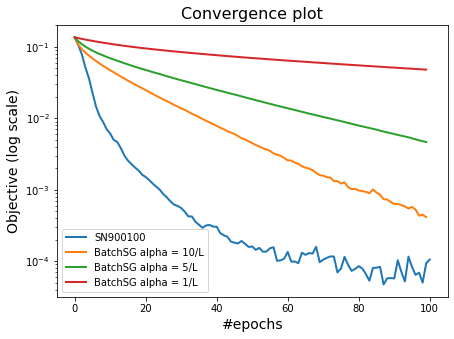

In [54]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_h-f_min_log, label="SN900100", lw=2)
plt.semilogy(obj_batch_sto_grad_1-f_min_log, label="BatchSG alpha = 10/L", lw=2)
plt.semilogy(obj_batch_sto_grad_2-f_min_log, label="BatchSG alpha = 5/L", lw=2)
plt.semilogy(obj_batch_sto_grad_3-f_min_log, label="BatchSG alpha = 1/L", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

#### Observation
Pour comparer la méthode du gradient stochastique par lot à notre méthode de Newton sous échantillonnée, nous l'appliquons à la taille de lot 900 qui correspond aux $max\{|S_k|,|S_k^H|\}$de notre meilleure modèle de Newton sous-échantillonnée. 

Nous avons appliqué la méthode sur trois pas $\alpha$ différents pour voir l'influence du pas d'apprentissage sur la méthode par rapport à notre problème. Nous voyons que plus $\alpha$ est grand plus la méthode converge rapidement. Mais nous voyons également que plus $\alpha$ est grand plus la courbe devient bruitée au fil des epochs. 

En regardant le plot, nous voyons que les méthodes de gradient stochastiques convergent vers la fonction de valeur optimale mais il leurs faudra plus d'epochs avant qu'ils ne trouvent la bonne fonction de valeur. Leur convergence est lente mais semble garantit au vue des courbes qui décroient de manière lente mais monotone. 

Maintenant, si nous comparons la méthode à notre meilleure méthode de Newton sous échantillonnée, nous voyons que la courbe de la méthode de Newton décroit plus rapidement que les autres. Cependant, comme nous l'avons vu plus haut, la courbe semble stagner à partir de la 80ème epoch. Il se peut ainsi qu'en augmentant le nombre d'epoch, que les courbes de la méthode de gradient finissent par aller en dessous de celle de la méthode de Newton sous échantillonnée. 

## <span style="color:rgb(139,0,0)">Part 4 - Binary classification on real-world data</span>

### <span style="color:rgb(139,0,0)">Implementation 4.1</span>

Dans cette partie, nous appliquons l'ensemble des techniques vues sur un problème de classification basé sur des données réelles. 

Nous avons choisit d'appliquer nos techniques sur le jeu de donnée *ijcnn1* composé de 22 features, de 49 990 données d'entrainement et de 91 701 données de tests. Chaque exemple est constitué d'un vecteur de caractéristiques et d'une étiquette de classe correspondantes. 

Nous avons récupéré le jeu de donnée sur https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/ 


Dans le code ci-dessous :

- Nous chargeons le jeu de données à l'aide de la fonction $load\_svmlight\_file()$ de la bibliothèque $scikit-learn$. 

- Nous analysons la structure des données et convertissons ces dernières dans le format que nous souhaitons.

In [2]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("ijcnn1.bz2")
    return data[0], data[1]

X, y = get_data()

________________________________________________________________________________
[Memory] Calling __main__--var-folders-b4-qm1pwtkx2m3_x2x185cvrv6c0000gn-T-ipykernel-2856542288.get_data...
get_data()
_________________________________________________________get_data - 0.4s, 0.0min


In [3]:
# X est une matrice creuse
print(X)

#On convertit X en une matrice dense
X = X.toarray()

  (0, 5)	1.0
  (0, 10)	-0.731854
  (0, 11)	0.173431
  (0, 12)	0.0
  (0, 13)	0.00027
  (0, 14)	0.011684
  (0, 15)	-0.011052
  (0, 16)	0.024452
  (0, 17)	0.008337
  (0, 18)	0.001324
  (0, 19)	0.025544
  (0, 20)	-0.040728
  (0, 21)	-0.00081
  (1, 6)	1.0
  (1, 10)	-0.731756
  (1, 11)	0.173431
  (1, 12)	0.00027
  (1, 13)	0.011684
  (1, 14)	-0.011052
  (1, 15)	0.024452
  (1, 16)	0.008337
  (1, 17)	0.001324
  (1, 18)	0.025544
  (1, 19)	-0.040728
  (1, 20)	-0.00081
  :	:
  (49988, 10)	-0.763423
  (49988, 11)	0.233429
  (49988, 12)	-0.015315
  (49988, 13)	0.005854
  (49988, 14)	-0.000797
  (49988, 15)	0.001382
  (49988, 16)	0.009477
  (49988, 17)	-0.015573
  (49988, 18)	0.015803
  (49988, 19)	-0.003587
  (49988, 20)	-0.008585
  (49988, 21)	0.010757
  (49989, 4)	1.0
  (49989, 10)	-0.762089
  (49989, 11)	0.233032
  (49989, 12)	0.005854
  (49989, 13)	-0.000797
  (49989, 14)	0.001382
  (49989, 15)	0.009477
  (49989, 16)	-0.015573
  (49989, 17)	0.015803
  (49989, 18)	-0.003587
  (49989, 19)	-0.00858

In [27]:
print(X)

[[ 0.0000e+00  0.0000e+00  0.0000e+00 ...  2.5544e-02 -4.0728e-02
  -8.1000e-04]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -4.0728e-02 -8.1000e-04
  -3.8900e-03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -8.1000e-04 -3.8900e-03
   4.6040e-03]
 ...
 [ 0.0000e+00  0.0000e+00  1.0000e+00 ...  1.5803e-02 -3.5870e-03
  -8.5850e-03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -3.5870e-03 -8.5850e-03
   1.0757e-02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -8.5850e-03  1.0757e-02
  -1.7981e-02]]


In [56]:
print("y avant : ",y)

#Convertir les labels en 0,1
new_y = np.where(y == -1.0, 0.0, y)

print("y maintenant : ",new_y)

y avant :  [-1. -1. -1. ... -1. -1. -1.]
y maintenant :  [0. 0. 0. ... 0. 0. 0.]


### <span style="color:rgb(139,0,0)">Implementation 4.2</span>

Nous nous focalisons désormais sur le problème d'optimisation définit par :

$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} g(w) 
    := \frac{1}{n} \sum_{i=1}^n g_i(\mathbf{w}), \qquad 
    g_i(\mathbf{w}):=(y_i - \frac {1}{1+\exp(-\mathbf{x}_i^T \mathbf{w})})^2
$$
$
$

Nous avons:
$$
    \nabla g_i(\mathbf{w}) = - \frac{2\exp(\mathbf{x}_i^T \mathbf{w})(\exp(\mathbf{x}_i^T \mathbf{w})(y_i-1)+y_i)}{(1 + \exp(\mathbf{x}_i^T \mathbf{w}))^3} \mathbf{x}_i
$$
$
$

$$
    \nabla^2 g_i(\mathbf{w}) = \frac{2\exp(\mathbf{x}_i^T \mathbf{w})(\exp(2\mathbf{x}_i^T \mathbf{w})(y_i-1)+2\exp(\mathbf{x}_i^T \mathbf{w})+y_i)}{(1 + \exp(\mathbf{x}_i^T \mathbf{w}))^4} \mathbf{x}_i \mathbf{x}_i^T
$$


La classe *Pb_part4()* permet d'instancier le problème que nous avons présenté plus haut. Elle prends en paramètre une matrice $X$ de données, un vecteur $y$. 

Au sein de cette classe, nous définissons les différentes fonctions dont nous avons besoin pour appliquer nos différentes méthodes. 

*Remarque*

Pour soucis de simplification de la tâche à la question 4, nous donnons aux méthodes de cette classe les même noms que les méthodes de la classe RegPb() que nous avons définie dans la partie 3.

In [29]:
class Pb_part4(object):
 
    # Instantiate the class
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
    
    # Objective value
    def fun(self, w):
          Xw = self.X.dot(w)
          return np.mean((self.y -(1/(1+np.exp(-Xw))))**2)
    
    # Partial objective value
    def f_i(self, i, w):
          y_i = self.y[i]
          x_i = self.X[i]
          xiw = np.dot(x_i.T, w)
          return (y_i -(1/(1+np.exp(- xiw))))**2

    # Full gradient computation
    def grad(self, w):
          Xw = self.X.dot(w)
          num = 2 * np.exp(Xw)*(np.exp(Xw)*(self.y - np.ones(self.n))+self.y)
          denom = (1. + np.exp(Xw))**3
          return - (self.X.T).dot(num/denom) / self.n
    
    # Partial gradient
    def grad_i(self,i,w):
        y_i = self.y[i]
        x_i = self.X[i]
        xiw = np.dot(x_i.T, w)
        num = - x_i * 2 * np.exp(xiw) * (np.exp(xiw)*(y_i-1)+y_i)
        denom = (1 + np.exp(xiw))**3
        grad = num/denom
        return grad

    # Partial second order gradient
    def grad_2_i(self,i,w):
        x_i = self.X[i]
        y_i = self.y[i]
        xiw = np.dot(x_i.T, w)
        num = 2 * np.exp(xiw) * (np.exp(2*xiw)*(y_i-1) + 2*np.exp(xiw) - y_i)
        denom = (1 + np.exp(xiw))**4
        gradient = (num/denom) * np.outer(x_i,x_i.T)
        return gradient

    # Lipschitz constant for the gradient
    def lipgrad(self):
        L = 4. * norm(self.X, ord=2) ** 2 / (self.n)
        return L

Dans cette partie, nous instancions le problème dans la variable $pb\_part\_4$ et nous définissons la fonction $compute\_gS\_gradS\_hessS()$ qui étant donnée une instance du problème et une taille d'échantillon calcule les valeurs de $g_S$, $\nabla g_S$ et $\nabla^2 g_S$ pour l'échantillon $S$. 
Nous affichons ensuite les différentes quantités calculées en appliquant la fonction sur $pb\_part\_4$ avec comme taille d'échantillon *20000*.

In [30]:
#Instanciate the problem
pb_part_4 = Pb_part4(X,new_y)
w = np.zeros(pb_part_4.d)

def compute_gS_gradS_hessS(problem,cardinal_sample,w,with_replace=False):
  n = problem.n
  dimension = problem.d
  i = np.random.choice(n,cardinal_sample,replace=with_replace)
  
  g_S = 0
  for j in range(cardinal_sample):
        g_j = problem.f_i(i[j],w)
        g_S = g_S + g_j
  g_S = g_S/cardinal_sample

  grad_S = np.zeros(dimension)

  for j in range(cardinal_sample):
        g_j = problem.grad_i(i[j],w)
        grad_S = grad_S + g_j
  grad_S = grad_S/cardinal_sample

  hess_S = np.zeros((dimension,dimension))

  for j in range(cardinal_sample):
        g_j = problem.grad_2_i(i[j],w)
        hess_S = hess_S + g_j
  hess_S = hess_S/cardinal_sample

  return g_S, grad_S, hess_S

g, grad, hessian = compute_gS_gradS_hessS(pb_part_4, 20000,w,with_replace=False)


In [31]:
print(g)

0.25


In [32]:
print(grad)

[ 1.98500000e-02  1.99250000e-02  2.03125000e-02  2.04500000e-02
  1.90125000e-02  2.01750000e-02  1.97625000e-02  2.06000000e-02
  2.02250000e-02  2.03625000e-02 -1.76444769e-02  6.38210699e-02
  2.27735075e-04 -7.53918875e-05  2.23119500e-04 -3.53408675e-04
  4.47392196e-03  7.33518683e-03  3.30933259e-03 -1.94715135e-03
 -6.00792687e-04 -7.85822050e-04]


In [33]:
print(hessian)

[[ 1.24000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.99249487e-04  3.85613655e-03
  -1.10366397e-03 -1.24076656e-03  5.53818819e-04  1.44086194e-03
  -9.14067144e-04 -3.73184438e-05 -1.74438625e-05 -4.61550681e-04
   4.98006250e-07  1.85324929e-03]
 [ 0.00000000e+00  1.27375000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.90766544e-04  4.03990309e-03
  -1.28138746e-03  5.65801644e-04  1.50949011e-03 -9.88050575e-04
   1.85686875e-06 -8.84498125e-06 -5.04539775e-04 -9.62711875e-06
   1.92936489e-03 -1.16916297e-03]
 [ 0.00000000e+00  0.00000000e+00  1.26437500e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.15185467e-03  4.05204305e-03
   5.84462706e-04  1.46379669e-03 -9.60910144e-04  3.91753125e-06
   6.5

In [34]:
# Use L-BFGS-B to determine a solution for both problems

# Compute the optimal solution for logistic regression
w_min, g_min, _ = fmin_l_bfgs_b(pb_part_4.fun, w, pb_part_4.grad, args=(), pgtol=1e-30, factr =1e-30)

print(w_min)
print(g_min)
print(norm(pb_part_4.grad(w_min)))

[ -2.35986213  -1.29517059  -2.24486588  -0.70999689  -0.53663299
  -1.69008875  -9.02615904  -0.90987868  -0.32906631  -1.33635112
  -1.57963114 -11.58730242   3.28457853   2.65745649   4.67169725
   2.39172502 -12.31326743 -24.37787111  -4.53177582   7.55787719
   3.93810247   5.95811641]
0.05154837396241317
7.112960362129767e-11


### <span style="color:rgb(139,0,0)"> Question 4.1</span>

Comparons à nouveau notre méthode de Newton sous échantillonnée à la méthode du gradient stochastique par lots sur ce problème réel de classification. 

Pour la comparaison :

- Nous avons choisit un nombre d'epochs de *100* pour effectuer la comparaison.

- Nous initialisons notre $w$ au vecteur nul de dimension d. 
 
- Nous avons choisit de tester la méthode échantillonnée avec les combinaisons de batchs suivantes $\{(1000,1000),(40000,10000),(40000,1000)\}$ 
où le premier élément de chaque couple correspond au $cardinal\_s$ et le deuxième élément au $cardinal\_sh$. L'idée derrière ces choix de batchs est de voir comment ces paramètres peuvent influencer la convergence, la précision, la variance ainsi que la complexité temporelle du modèle. 
- Nous appliquons les différentes méthodes avec comme paramètre $c=0.0001$ et $\mu=2$ qui dans ce contexte réel ne causent pas de soucis. 

- À nouveau nous appliquons la méthode de gradient stochastique par lots avec comme taille de batch correspondant à celui de notre meilleur modèle et avec différents choix de pas d'apprentissage.

In [36]:
nb_epochs = 100
w_g_1, obj_g_1, nits_g_1=globalized_subsampling_newtons_method(w, pb_part_4,w_min, 0.0001, 2, 40000,10000, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_g_1)

resultat :  [ -2.41925784  -1.41235175  -2.27649112  -0.7185612   -0.61978932
  -1.70487836  -9.32711507  -1.01913217  -0.33564423  -1.35033762
  -1.59802244 -11.21734384   2.79023727   3.35529392   4.94615524
   3.19170984 -12.42375305 -24.30420494  -4.39541732   7.36225089
   4.17688712   5.02880194]


In [59]:
w_g_2, obj_g_2, nits_g_2=globalized_subsampling_newtons_method(w, pb_part_4,w_min, 0.0001, 2, 40000,1000, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_g_2)

resultat :  [ -2.24008594  -1.33522126  -2.18298001  -0.79050755  -0.57706206
  -1.71472863  -9.04493345  -0.93556799  -0.38638729  -1.39820252
  -1.64206885 -11.45808841   2.97198874   2.4421396    4.9710988
   2.51655968 -12.05384312 -24.63906001  -4.45690547   7.52500262
   3.82067734   5.94213019]


In [60]:
w_g_3, obj_g_3, nits_g_3=globalized_subsampling_newtons_method(w, pb_part_4,w_min, 0.0001, 2, 1000,1000, n_epochs=nb_epochs,with_replace=False,verbose=False)
print("resultat : ",w_g_3)

<ipython-input-29-ce618e2af9de>:21: RuntimeWarning: overflow encountered in exp
  return (y_i -(1/(1+np.exp(- xiw))))**2


resultat :  [ -4.6832402   -1.80865901  -2.07834504  -0.52054858  -0.68684074
  -2.42701301 -49.45148411  -1.13729333   0.14218166  -1.79718635
  -0.96758895  -7.69284186   0.29531663   1.96161003   1.80092192
   2.75315627  -8.78136343 -18.77007845  -0.8489903    4.42905545
   5.83103837   3.72238552]


In [63]:
w_batch_1, obj_batch_1, nits_batch_1= batch_stochastique_grad(w,pb_part_4,w_min,n_epochs=100,cardinal_s=40000,coef_mult=10,with_replace=False,verbose=False)
print("resultat : ",w_batch_1)

resultat :  [-1.36766005 -1.26635553 -1.45793337 -1.14011047 -1.08284243 -1.43798849
 -1.71580114 -1.18236409 -1.11416895 -1.2146015   0.02608549 -2.12515009
  0.07045023  0.10802357  0.10626325 -0.19071424 -2.13761838 -3.34318163
 -1.48352657  0.880815    0.52547185  0.55604139]


In [64]:
w_batch_2, obj_batch_2, nits_batch_2= batch_stochastique_grad(w,pb_part_4,w_min,n_epochs=100,cardinal_s=40000,coef_mult=5,with_replace=False,verbose=False)
print("resultat : ",w_batch_2)

resultat :  [-1.20460756 -1.14438195 -1.27337737 -1.11941958 -1.09416022 -1.24898632
 -1.34231543 -1.13761914 -1.12138956 -1.13597556  0.22177039 -2.63503437
  0.02149708  0.0380965   0.03961443 -0.06586116 -1.15796335 -1.76299232
 -0.80856338  0.48977773  0.25880972  0.28084187]


In [65]:
w_batch_3, obj_batch_3, nits_batch_3= batch_stochastique_grad(w,pb_part_4,w_min,n_epochs=100,cardinal_s=40000,coef_mult=1,with_replace=False,verbose=False)
print("resultat : ",w_batch_3)

resultat :  [-0.79252128 -0.77371518 -0.81837682 -0.78209248 -0.77447416 -0.81036674
 -0.82167818 -0.78353251 -0.78582954 -0.77888885  0.32390224 -2.19113979
 -0.00273155  0.00396661  0.00538684 -0.0092664  -0.32859374 -0.52056966
 -0.22251593  0.14547031  0.06829461  0.07467719]


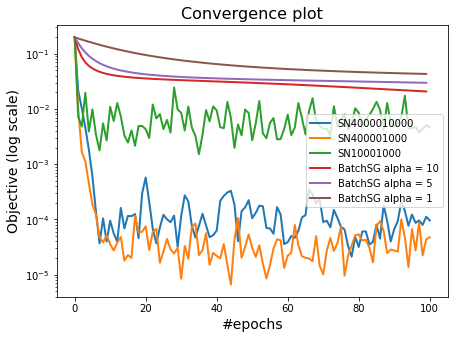

In [71]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_g_1-g_min, label="SN4000010000", lw=2)
plt.semilogy(obj_g_2-g_min, label="SN400001000", lw=2)
plt.semilogy(obj_g_3-g_min, label="SN10001000", lw=2)
plt.semilogy(obj_batch_1-g_min, label="BatchSG alpha = 10", lw=2)
plt.semilogy(obj_batch_2-g_min, label="BatchSG alpha = 5", lw=2)
plt.semilogy(obj_batch_3-g_min, label="BatchSG alpha = 1", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

#### Observation 

Nous pouvons analyser les résultats sur différents plans:

- Sur le plan de la précision:

À nouveau, nous constatons sur ce modèle réelle que la méthode de Newton sous-échantillonnée est fortement bruitée. Cependant, dans ce cas de figure les tailles de batches ne semblent pas vraiment influencer les variations des courbes, ont constate des variations très similaires pour les trois courbes de Newton sous-échantillonnées. 

Un autre point commun à ce que nous avions constaté sur les données synthétiques est que la méthode est plus performante lorsque $cardinal\_s >> cardinal\_sh$. 

Ainsi, sur le problème que nous avons définit, sur ce jeu de données réel et sur les différentes combinaisons de batchs que nous avons testées, la méthode associée à la courbe *SN400001000* est la plus proche de la fonction de valeur optimale. 

Si nous comparons aux méthodes de gradient stochastiques, nous voyons que même la pire combinaison de batch pour la méthode de Newton sous échantillonnée (*SN10001000*) reste en dessous de l'ensemble des courbes des gradients stochastiques. 

Ainsi, cela montre l'intérêt de prendre en compte l'information sur la matrice Hessienne dans les méthodes de Newton. 


- Sur le plan de la convergence:

À nouveau, le comportement dans le cas réel est très proche de celui dans le cas synthétique. Bien que les courbes des méthodes de Newton sous échantillonnées soient en dessous de celles du gradient stochastique, nous constatons une stagnation de ces dernières qui semblent ne pas évoluer au fil des epochs. Celles du gradient stochastique décroient de façon très lente, il faudra un nombre extrêmement grand d'epochs pour qu'elles puissent converger. 

- Sur le plan de la complexité temporelle:

Nous avons relevé le temps d'exécution de chaque modèle et obtenons: 

  *SN10001000* : 3min47s

  *SN400001000* : 4min42s

  *SN400001000* : 4min8s

  *Méthodes gradient stochastique* : 1min20s

Ainsi, en terme de complexité temporelle, les méthodes de gradient stochastique sont beaucoup plus rapide. Il s'agit d'un résultat non surprenant. Effectivement, les méthodes de gradient stochastiques ne calculent pas de matrice hessienne et n'ont pas de condition d'Armijo qui pourraient ralentir le temps d'exécution. Concernant les méthodes de Newton sous échantillonnées nous voyons que celle avec les tailles de batchs les plus petits est la plus rapide, ce qui n'était pas le cas dans les données synthétiques. 

Ainsi, pour conclure sur ce problème, nous pouvons dire que les méthodes de Newton sous échantillonnées semblent être plus performantes que les méthodes classiques de gradient stochastique. Elles prennent en compte l'information sur le gradient de second ordre ce qui leur permet de trouver plus rapidement la fonction de valeur optimale. Cependant, il s'agit de méthode à variance forte qui stagnent au bout d'un certain nombre d'epochs. 